# Example usage of Millefy

In [1]:
library(millefy)

Warning message:
“replacing previous import ‘IRanges::shift’ by ‘data.table::shift’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::distance’ by ‘destiny::distance’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::slice’ by ‘dplyr::slice’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::collapse’ by ‘dplyr::collapse’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::intersect’ by ‘dplyr::intersect’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘millefy’”Warning message:
“replacing previous imp

In [2]:
setwd("../")

## Input files

### BigWig files (scRNA-seq samples)

In [3]:
bwfiles = list.files("bigwig_files", ".+h_.+.bw", full.names = TRUE, recursive=TRUE)
length(bwfiles)
head(bwfiles)

[1] 465

[1] "bigwig_files/RamDA_00h_A04/RamDA_00h_A04.bw"
[2] "bigwig_files/RamDA_00h_A05/RamDA_00h_A05.bw"
[3] "bigwig_files/RamDA_00h_A06/RamDA_00h_A06.bw"
[4] "bigwig_files/RamDA_00h_A07/RamDA_00h_A07.bw"
[5] "bigwig_files/RamDA_00h_A08/RamDA_00h_A08.bw"
[6] "bigwig_files/RamDA_00h_A09/RamDA_00h_A09.bw"

In [4]:
# Set groups
labels <- gsub(".bw", "", basename(bwfiles))
groups <- gsub("_.+", "", gsub("RamDA_", "", labels))
table(groups)

groups
00h 12h 24h 48h 72h 
 93  93  93  93  93 

In [5]:
# Set group colors
color_labels <- colorRampPalette(c("yellow", "red"))(length(unique(groups))+1)[1:length(unique(groups))]
names(color_labels) <- unique(groups)
color_labels

00h       12h       24h       48h       72h 
"#FFFF00" "#FFCC00" "#FF9900" "#FF6500" "#FF3200"

### BAM files (bulk NGS samples)

In [6]:
bam_files <- list.files("bam_files", "*.uniq.q40.proper_pair.bam$", recursive = T, full.names = T)
length(bam_files)
head(bam_files)

[1] 12

[1] "bam_files/ES0-1/ES0-1.uniq.q40.proper_pair.bam"  
[2] "bam_files/ES0-2/ES0-2.uniq.q40.proper_pair.bam"  
[3] "bam_files/ES0-3/ES0-3.uniq.q40.proper_pair.bam"  
[4] "bam_files/ES72-1/ES72-1.uniq.q40.proper_pair.bam"
[5] "bam_files/ES72-2/ES72-2.uniq.q40.proper_pair.bam"
[6] "bam_files/ES72-3/ES72-3.uniq.q40.proper_pair.bam"

In [7]:
# Calculate normalization factors based on the number of mapped reads in every BAM file (It takes a little time)
nf = calcBamNormFactors(bam_files)
length(nf)
head(nf)

[1] 12

bam_files/ES0-1/ES0-1.uniq.q40.proper_pair.bam 
                                      0.03812983 
  bam_files/ES0-2/ES0-2.uniq.q40.proper_pair.bam 
                                      0.03434027 
  bam_files/ES0-3/ES0-3.uniq.q40.proper_pair.bam 
                                      0.03346271 
bam_files/ES72-1/ES72-1.uniq.q40.proper_pair.bam 
                                      0.03626540 
bam_files/ES72-2/ES72-2.uniq.q40.proper_pair.bam 
                                      0.02726755 
bam_files/ES72-3/ES72-3.uniq.q40.proper_pair.bam 
                                      0.03358089

In [12]:
groups2 = gsub("[-_][0-9]+", "", basename(dirname(bam_files)))
length(groups2)
table(groups2)

[1] 12

groups2
   ES0   ES72  paES0 paES72 
     3      3      3      3 

### GTF file (gene models)

In [8]:
# Load gene models (It takes a little time)
path_gtf1 <- "GENCODE/gencode.vM15.primary_assembly.annotation.gtf"
dt_gtf_exon1 <- gtfToDtExon(path_gtf1)

### Set tracks

In [28]:
# Set tracks
## Single-cell track
scTrackBw <- list(path_bam_files = bwfiles, groups = groups, group_colors = color_labels, max_value = 7873, isBw=TRUE)

## Bulk NGS data track
cvTrack1 <- list(path_bam_files = bam_files, normFactor = nf, groups = groups2, trackHeight = 1)

## Gene annotation track
geneTrack1 <- list(path_gtf = path_gtf1, dt_gtf = dt_gtf_exon1, label = basename(path_gtf1))

# List of tracks
tdlist <- list(scTrackBw, cvTrack1, geneTrack1)
# List of track types
tt <- c("sc","add", "gene")
# List of track hights
heights = c(20, 0.5, 2)

### Set a location

In [29]:
chr =  "chr19"
start = 5824708
end = 5845478
text_main = sprintf("%s, RamDA time series", "Neat1")

## Plot

### Default
When we don't set the sc_sort_destiny parameter (default), the order of single cells is the order of bwfiles.



[1] "Begin millefyPlot: 2019-02-01 11:03:25"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
[1] "Importing BigWig: 2019-02-01 11:03:25"
[1] "Start importing BAM: 2019-02-01 11:03:56"
[1] "End importing BAM: 2019-02-01 11:04:00"
[1] "Finished millefyPlot: 2019-02-01 11:04:00"


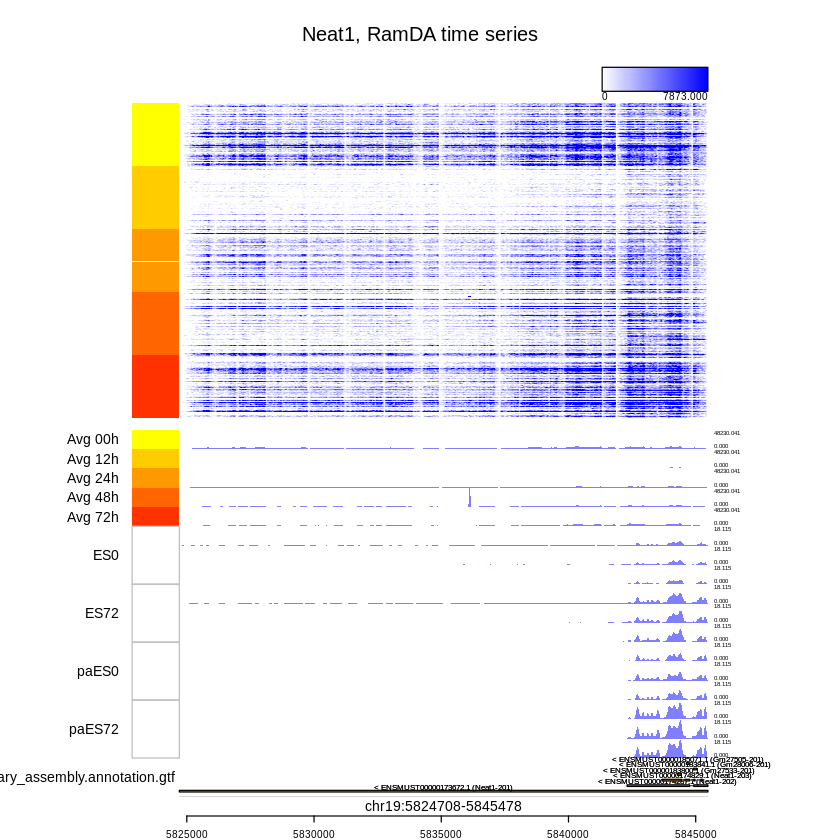

In [30]:
# 実行
l <- millefyPlot(track_data=tdlist, track_type=tt, heights=heights, sc_type = "heatmap", 
                  chr = chr, start = start, end = end, 
                  sc_avg = TRUE, sc_avg_height = 1, title = text_main)

### Replot ('all-cell' mode)
When we set sc_sort_destiny = 'all', all single cells are reordered by diffusion maps.

[1] "Begin millefyPlot: 2019-02-01 11:05:31"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.970624
[1] "Finished millefyPlot: 2019-02-01 11:05:38"


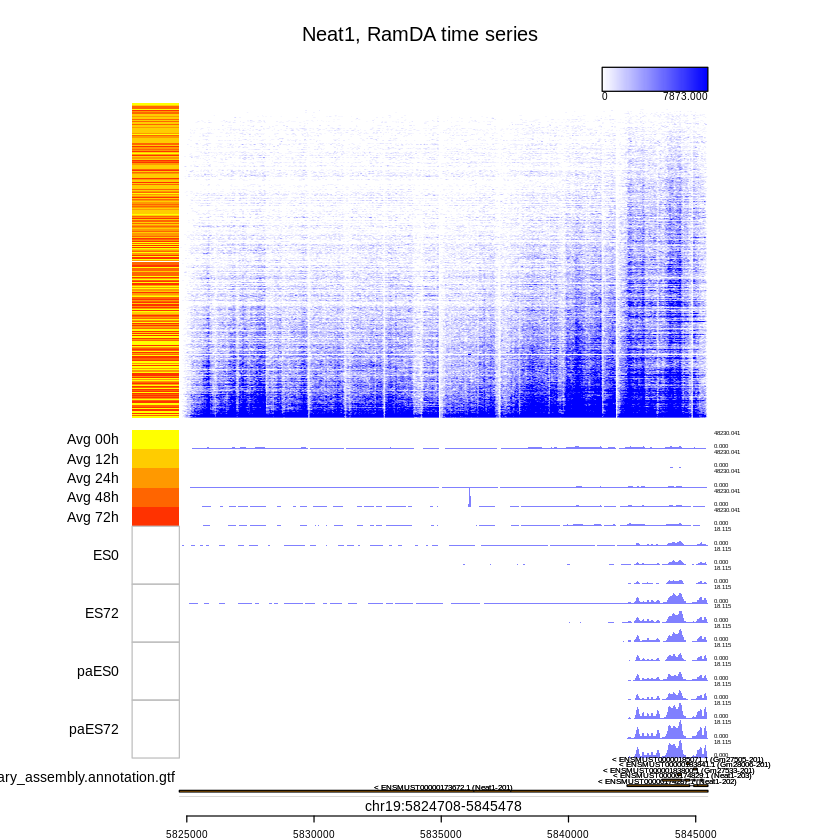

In [33]:
invisible(millefyPlot(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", 
                       chr = chr, start = start, end = end, sc_avg = TRUE, 
                       sc_avg_height = 1, title = text_main, sc_sort_destiny = 'all'))

### Replot ('group-wise' mode)
When we set sc_sort_destiny = 'group', all single cells in each group are reordered by diffusion maps.

[1] "Begin millefyPlot: 2019-02-01 11:05:38"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.970624
[1] "Finished millefyPlot: 2019-02-01 11:05:46"


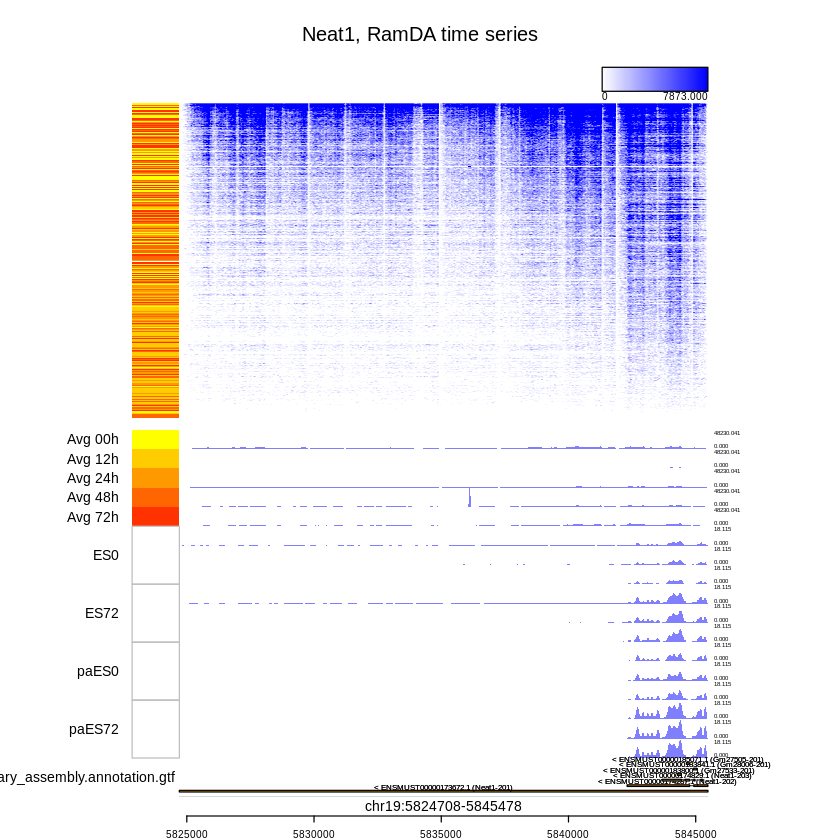

In [34]:
invisible(millefyPlot(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", 
                       chr = chr, start = start, end = end, sc_avg = TRUE,
                       sc_avg_height = 1, title = text_main, sc_sort_destiny = 'all'))

### Replot (Change scale of averaged single-cell read coverage track)
Using `sc_avg_scale`, you can change the scale of the averaged single-cell read coverage tracks

[1] "Begin millefyPlot: 2019-02-01 11:05:47"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.970624
[1] "Finished millefyPlot: 2019-02-01 11:05:54"


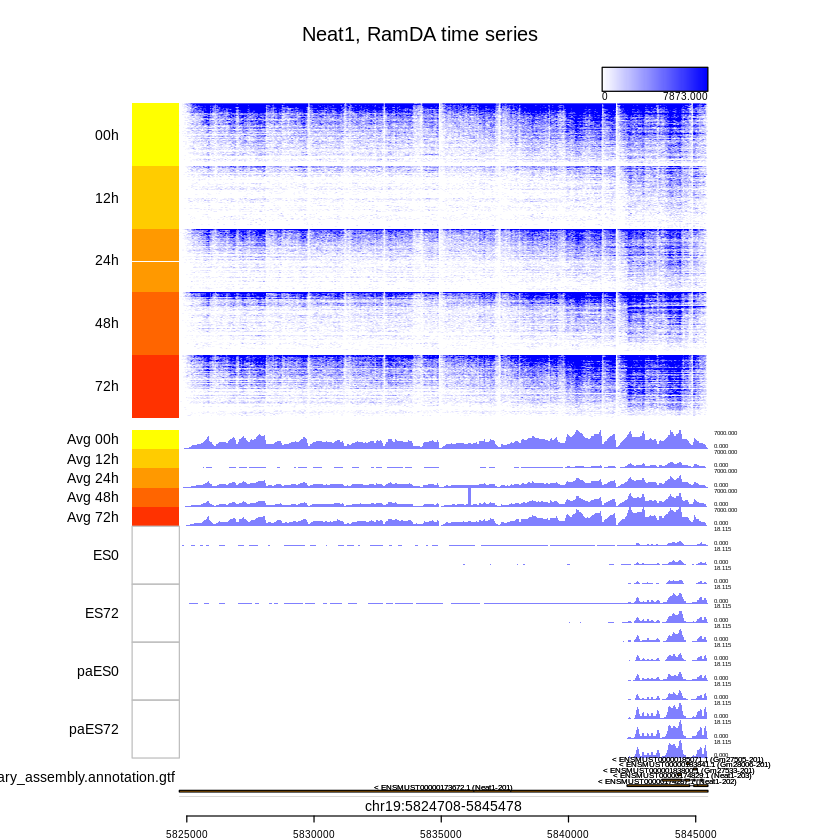

In [35]:
invisible(
	millefyPlot(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", 
                 chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, 
                 title = text_main, sc_avg_scale = 7000, sc_sort_destiny = 'group')
)

## sessionInfo

In [36]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /opt/conda/lib/R/lib/libRblas.so
LAPACK: /opt/conda/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] millefy_0.1.8

loaded via a namespace (and not attached):
  [1] matrixStats_0.54.0         bitops_1.0-6              
  [3] destiny_2.6.2              xts_0.11-2                
  [5] RColorBrewer_1.1-2         GenomeInfoDb_1.14.0       
  [7] repr_0.12.0                tools_3.4.1               
